# What the code does:

1. Partition original loading video into clips of all loading regions
2. Speedup/Delay regions of pages
3. Overlay region clips onto original video



In [1]:
from moviepy.video import *
from moviepy.editor import *
import os
import cv2
from PIL import Image
import pandas as pd


In [2]:
video = 'van.mp4'
url= 'Almanac'
path_indata = '../webgaze_videos'

# Read video clip and page segmentation

In [3]:
def read_boxes():
    input_path = 'motivation_data/gaze/boxes'
    web_url = list(pd.read_csv('./webgaze_comparison_data/sorted_sites.txt',header=None).iloc[:,0])
    web_url = list(map(lambda x:x.split('.')[0],web_url[:]))
    boxes = {}

    for url in web_url[:]:
        if url == 'Nysparks':
            f = list(filter(lambda x: 'nysparks' in x, os.listdir(input_path)))[0]
        else:
            f = list(filter(lambda x: url in x, os.listdir(input_path)))[0]
        page_segment = pd.read_csv(os.path.join(input_path, f),header=None)
        page_segment = page_segment.values
        boxes[url] = page_segment
    return boxes

In [4]:
# obtain the segmentation of a webpage (see visualization of these regions in appendix)
boxes = read_boxes()
clip = VideoFileClip(os.path.join(path_indata, url,video))
clip  = clip.subclip(2,7) # take subclip because loading process mostly happens here

OSError: MoviePy error: the file ../webgaze_videos/Almanac/van.mp4 could not be found!
Please check that you entered the correct path.

# Delay regions of web pages

In [42]:
# delay region 5,6,7 by 2 seconds
change = [0] * len(boxes[url])
change[5] = 2
change[6] = 2
change[7] = 2


composite_list = []

for i in range(len(change)):
    if change[i] != 0:
        box = boxes[url][i]
        new_clip = vfx.crop(clip, x1 = box[0], x2= box[2], y1=box[1], y2=box[3])
        new_clip = vfx.freeze(new_clip,t=0,freeze_duration=change[i])
        composite_list.append(new_clip.set_position(box[:2])) 
video_duration = max(list(map(lambda x: x.duration, composite_list)))
                           
# extend base clip to duration of final video
if clip.duration < video_duration:
        remainder = video_duration - clip.duration
        orig_clip= vfx.freeze(clip,t=clip.duration-0.5,freeze_duration=remainder)

composite_list.insert(0, orig_clip)

   
final = CompositeVideoClip(composite_list)
final.write_videofile("delay.mp4")


t:   4%|▍         | 3/70 [00:00<00:02, 25.63it/s, now=None]

Moviepy - Building video delay.mp4.
Moviepy - Writing video delay.mp4




t:   4%|▍         | 27/621 [00:28<04:16,  2.32it/s, now=None][A

Moviepy - Done !
Moviepy - video ready delay.mp4


# Speedup regions of webpages

In [45]:
# speed up region 5,6,7 by 2x
change = [0] * len(boxes[url])
change[5] = 2
change[6] = 2
change[7] = 2

composite_list = []
for i in range(len(change)):
    if change[i] != 0:
        box = boxes[url][i]
        new_clip = vfx.crop(clip, x1 = box[0], x2= box[2], y1=box[1], y2=box[3])
        new_clip = new_clip.speedx(factor=2) 
        composite_list.append(new_clip.set_position(box[:2])) 

orig_clip = clip
composite_list.insert(0, orig_clip)

   
final = CompositeVideoClip(composite_list)
final.write_videofile("2xspeedup.mp4")


                                                           
t:  18%|█▊        | 9/50 [00:04<00:16,  2.54it/s, now=None] 
                                                           ]
t:  16%|█▌        | 11/70 [00:21<00:26,  2.19it/s, now=None]

t:   0%|          | 0/50 [00:00<?, ?it/s, now=None]

Moviepy - Building video 2xspeedup.mp4.
Moviepy - Writing video 2xspeedup.mp4





t:   6%|▌         | 3/50 [00:00<00:02, 20.59it/s, now=None]

t:  10%|█         | 5/50 [00:00<00:05,  8.99it/s, now=None]

t:  12%|█▏        | 6/50 [00:01<00:09,  4.48it/s, now=None]

t:  14%|█▍        | 7/50 [00:01<00:13,  3.29it/s, now=None]

t:  16%|█▌        | 8/50 [00:02<00:14,  2.83it/s, now=None]

t:  18%|█▊        | 9/50 [00:02<00:15,  2.58it/s, now=None]

t:  20%|██        | 10/50 [00:03<00:16,  2.37it/s, now=None]

t:  22%|██▏       | 11/50 [00:03<00:17,  2.21it/s, now=None]

t:  24%|██▍       | 12/50 [00:04<00:17,  2.11it/s, now=None]

t:  26%|██▌       | 13/50 [00:04<00:18,  2.03it/s, now=None]

t:  28%|██▊       | 14/50 [00:05<00:18,  1.93it/s, now=None]

t:  30%|███       | 15/50 [00:05<00:18,  1.87it/s, now=None]

t:  32%|███▏      | 16/50 [00:06<00:19,  1.77it/s, now=None]

t:  34%|███▍      | 17/50 [00:07<00:18,  1.75it/s, now=None]

t:  36%|███▌      | 18/50 [00:07<00:18,  1.72it/s, now=None]

t:  38%|███▊      | 19/50 [00:08<00:18,  1.67it/s, now=None]

t:  40%|████

Moviepy - Done !
Moviepy - video ready 2xspeedup.mp4


# Example: separate_poke2

In [ ]:
try:
    os.mkdir('campaign/separate_poke2')
except:
    pass

# Appendix

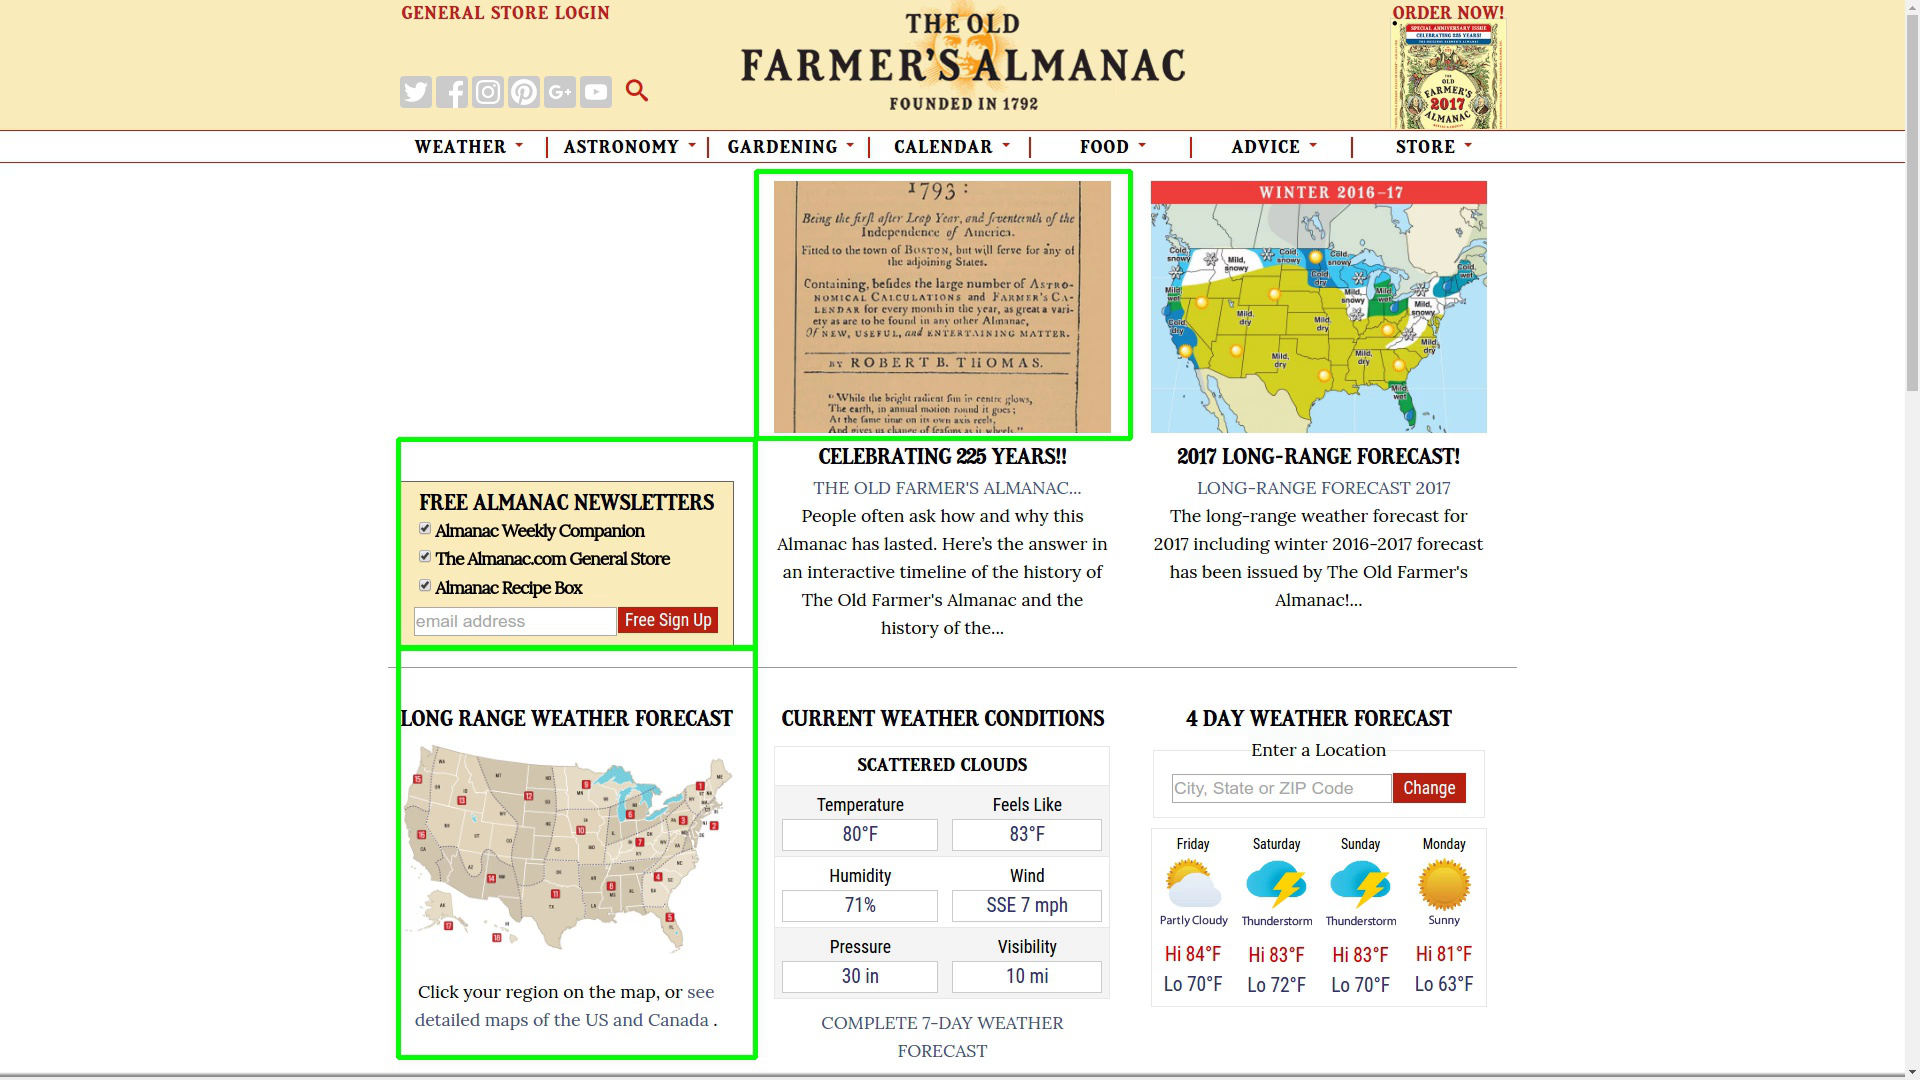

In [11]:
clip = VideoFileClip(os.path.join(path_indata, url,video))
  
# getting frame at time 10
img = clip.get_frame(30)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#visualize boxes 5,6,7
for i in range(5,8):
    b = boxes[url][i]
    first  = (b[0],b[1])
    second = (b[2],b[3])
    cv2.rectangle(img,first,second,(0,255,0),3)
    
cv2.imwrite('temp.jpg',img)
Image.open('temp.jpg')